# Make Rectangle and Ellipse

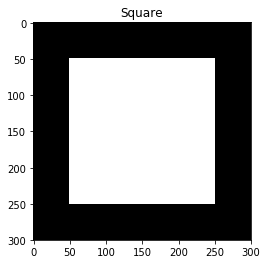

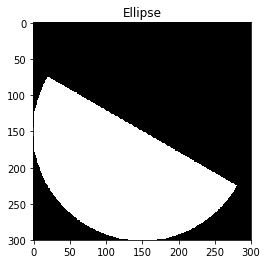

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -2)
cv2.imshow("Square", square)
cv2.waitKey(0)

plt.imshow(square, cmap="gray")
plt.title('Square')
plt.show()

ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)
cv2.imshow("Ellipse", ellipse)
cv2.waitKey(0)

plt.imshow(ellipse, cmap="gray")
plt.title('Ellipse')
plt.show()

cv2.destroyAllWindows()

# AND - OR - NOT - XOR

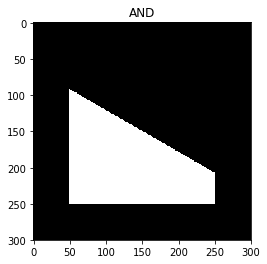

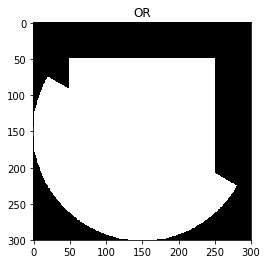

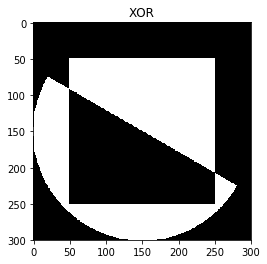

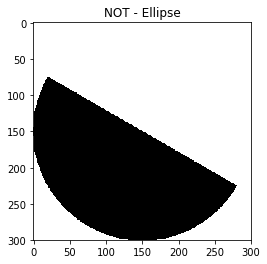

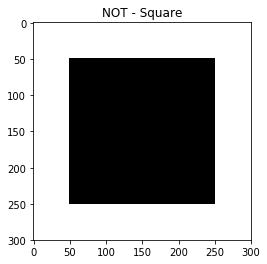

In [2]:
bitwiseAnd = cv2.bitwise_and(square, ellipse)
cv2.imshow("AND", bitwiseAnd)
cv2.waitKey(0)

plt.imshow(bitwiseAnd, cmap="gray")
plt.title('AND')
plt.show()

bitwiseOr = cv2.bitwise_or(square, ellipse)
cv2.imshow("OR", bitwiseOr)
cv2.waitKey(0) 

plt.imshow(bitwiseOr, cmap="gray")
plt.title('OR')
plt.show()

bitwiseXor = cv2.bitwise_xor(square, ellipse)
cv2.imshow("XOR", bitwiseXor)
cv2.waitKey(0)

plt.imshow(bitwiseXor, cmap="gray")
plt.title('XOR')
plt.show()

bitwiseNot_el = cv2.bitwise_not(ellipse)
cv2.imshow("NOT - ellipse", bitwiseNot_el)
cv2.waitKey(0)

plt.imshow(bitwiseNot_el, cmap="gray")
plt.title('NOT - Ellipse')
plt.show()

bitwiseNot_sq = cv2.bitwise_not(square)
cv2.imshow("NOT - square", bitwiseNot_sq)
cv2.waitKey(0)

plt.imshow(bitwiseNot_sq, cmap="gray")
plt.title('NOT - Square')
plt.show()

cv2.destroyAllWindows()